# linear_decoder.py

## Overview

### _**linear_decoder.py**_ is a Python module designed to integrate techniques required for reconstructing external stimuli from evoked neural signals in response to external stimuli using machine learning approaches. This tool is particularly useful in neuroscience research, where understanding the relationship between neural activity and external stimuli is crucial.

One of the fascinating challenges in neuroscience is assessing how reliably neural responses reflect external stimuli. A common approach to this is decoding external stimuli from evoked neural responses, which can include various forms of neural data such as:

- Spiking activity,
- Local Field Potentials (LFP).
- Electroencephalography (EEG) signals.

The _**LinearDecoder**_ class, defined in the _**linear_decoder.py**_ module, provides functionality for this decoding process, facilitating the analysis of neural recordings and enhancing the interpretability of decoding results. This tool is valuable for researchers studying neural coding, sensory processing, and brain-computer interfaces.

### Methodology

_**LinearDecoder**_ employs a supervised learning algorithm to train a decoder with an exponential kernel to reconstruct external stimuli from evoked neural responses. The core of the method involves solving a regularized least squares problem to determine the weights of the linear decoder in a supervised manner.

Key features of the LinearDecoder include:
- Use of first-order statistics of neural decoding (the amplitude and timing of evoked neural responses).
- Application of regularization techniques to improve generalization.
- Flexibility to work with various types of neural data.

## Current Limitations and Future Developments

It is important to note that the current version of _**LinearDecoder**_ focuses on first-order statistics of neural responses for decoding. Future developments may include:

- Incorporation of higher-order statistics for encoding information, such as network correlations and noise correlations.
- Implementation of more advanced models, such as recurrent rate neural networks, to address the higher-order statistics.

These enhancements would allow for more sophisticated analysis of neural data, potentially revealing deeper insights into neural coding mechanisms.

### Applications in Neuroscience Research

The LinearDecoder can be particularly useful in various neuroscience research areas, including:

1. **Multisensory Integration Studies**: Investigating how the brain combines information from different sensory modalities.
2. **Autism Research**: Examining how autism might modulate sensory integration processes.
3. **ADHD Studies**: Assessing whether attention deficit disorders have differential effects on auditory versus visual sensory processing.
4. **Brain-Computer Interfaces**: Developing systems that translate neural signals into control commands for external devices.
5. **Sensory Neuroscience**: Exploring how different sensory stimuli are encoded in neural activity.

By providing a tool for quantitative analysis of neural responses, _**LinearDecoder**_ contributes to our understanding of brain function and information processing in various contexts.

------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------

## Installation

To install the _**linear_decoder.py**_ module, ensure the necessary Python libraries **numpy** and **sklearn** are installed. Please verify that the corresponding dependencies are present.

### Optional testing instructions for contributors or interested users:
To confirm that the scripts and required libraries are installed on your local machine, navigate to the  _**linear_decoder**_  directory. You can begin by testing the Python scripts within the project and scripts directories. To do this, install the Python library nose2 and execute it from the command line:
```
$ git clone https://github.com/your_username/linear-decoder.git
$ cd path/to/the/linear-decoder.git
$ pip install -e .[tests]
$ pip install nose2
$ python -m nose2
```

To **install** the _**LinearDecoder**_ module from GitHub, run the following command:
```
!pip install git+ssh://git@github.com/fraziphy/linear-decoder.git
```

In [1]:
!pip install git+ssh://git@github.com/fraziphy/linear-decoder.git

  Cloning ssh://****@github.com/fraziphy/linear-decoder.git to /private/var/folders/vq/wqh08z6d6wbcm3z2r206cfn00000gn/T/pip-req-build-rlxoxt0f
  Running command git clone --filter=blob:none --quiet 'ssh://****@github.com/fraziphy/linear-decoder.git' /private/var/folders/vq/wqh08z6d6wbcm3z2r206cfn00000gn/T/pip-req-build-rlxoxt0f
  Resolved ssh://****@github.com/fraziphy/linear-decoder.git to commit a9d4567f08f560b44c1891451f2bb3ddba1f146c
  Preparing metadata (setup.py) ... done
  Created wheel for lineardecoder: filename=lineardecoder-0.1.0-py3-none-any.whl size=21566 sha256=550f4357eb7bb3715b9bd89926ea0755ea86d8b79f371c459d00cd62cf2c595a
  Stored in directory: /private/var/folders/vq/wqh08z6d6wbcm3z2r206cfn00000gn/T/pip-ephem-wheel-cache-lkad02d5/wheels/6b/d5/c1/78a83f1b58236b8d7899d36c10b3fc607b465c0c07cf437f89
Successfully built lineardecoder


------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------

To **uninstall** the module, please copy and execute the following command in a single cell:

```
!python -m pip uninstall LinearDecoder --yes
```

------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------

## Usage

After a successful installation, you can import the module using the following syntax:
```
from linear_decoder import LinearDecoder # The Class LinearDecoder in the linear_decoder module to decode external stimuli from neural recordings 
```
Follow these steps to use the decoder:

### 1. Initialize the decoder
```
decoder = LinearDecoder(dt, tau, lambda_reg, rng)
```

**Parameters:**
- `dt`: Recording resolution (time step) in milliseconds.
- `tau`: Time constant for the exponential kernel in milliseconds.
- `lambda_reg`: Regularization strength to prevent overfitting.
- `rng`: Random number generator (e.g., `np.random.default_rng(seed)`).

### 2. Preprocess data
```
filtered_spikes = decoder.preprocess_data(spikes_trials_all, n_neurons, duration)
```

**Parameters:**
- `n_neurons`: Number of neurons in the recording (or recording channels in LFP/EEG).
- `duration`: Total duration of the recording in milliseconds.

**Note:** 
- `spikes_trials_all` should be a list of trials, where each trial is a list of tuples of spike_time and neuron_id (spike_time, neuron_id)`.
- The resulting `filtered_spikes` will have shape `(n_trials, n_steps, n_neurons)`.

### 3. Fit the decoder and make predictions
```
decoder.fit(filtered_spikes[training_trial_indices], signal)
prediction = decoder.predict(filtered_spikes[test_trial_indices])
RMSE = decoder.compute_rmse(prediction, signal)
```

### 4. Perform stratified cross-validation
```
train_errors, test_errors, all_weights = decoder.stratified_cv(filtered_spikes, signal, n_splits=5)
```

After performing stratified cross-validation, you can access:
- `decoder.example_predicted_train`: An example of a predicted signal for a training trial.
- `decoder.example_predicted_test`: An example of a predicted signal for a test trial.

## Important Considerations

- Ensure the signal is a 2D array with dimensions `(n_signals, n_time_steps)`.
- Make sure the signal has the same temporal resolution as your recording (determined by `dt`).
- The `duration` and `dt` parameters should match the temporal properties of your spike data and signal.

## Accessing Help

You can access this guide within your code by using:
```
decoder.help
```

This will print the usage instructions directly in your Python environment.

## Example Notebook

This Jupyter notebook has been included to demonstrate how to use the _**LinearDecoder**_ class with dummy data. The notebook verifies that the defined class can perform decoding tasks effectively.

------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------

In [1]:
from linear_decoder import LinearDecoder  # Import the LinearDecoder class from the linear_decoder module
import numpy as np  # Import NumPy for numerical operations
import sys  # Import the sys module to manipulate Python's runtime environment
sys.path.append('../scripts')  # Add the '../scripts' directory to Python's sys.path to allow imports from that directory
from generate_data import dummy_spiketimes  # Import the dummy_spiketimes function from the generate_data module
from plots import plot_raster  # Import the plot_raster function from the plots module
from plots import plot_results  # Import the plot_results function from the plots module

In [2]:
n_neurons = 1000  # Set the number of neurons
duration = 200  # Set the duration of the simulation in seconds
dt = 0.1  # Set the time step (delta t) in seconds
avg_rate = 5  # Set the average firing rate of neurons in Hz

In [4]:
spikes_trials_all = []  # Initialize an empty list to store spike times for all trials
n_trials = 10  # Set the number of trials to simulate
for trial in range(n_trials):  # Loop through each trial
    spikes = dummy_spiketimes(n_neurons, duration, dt, avg_rate)  # Generate dummy spike times for one trial
    spikes_trials_all.append(spikes)  # Add the generated spike times to the list of all trials

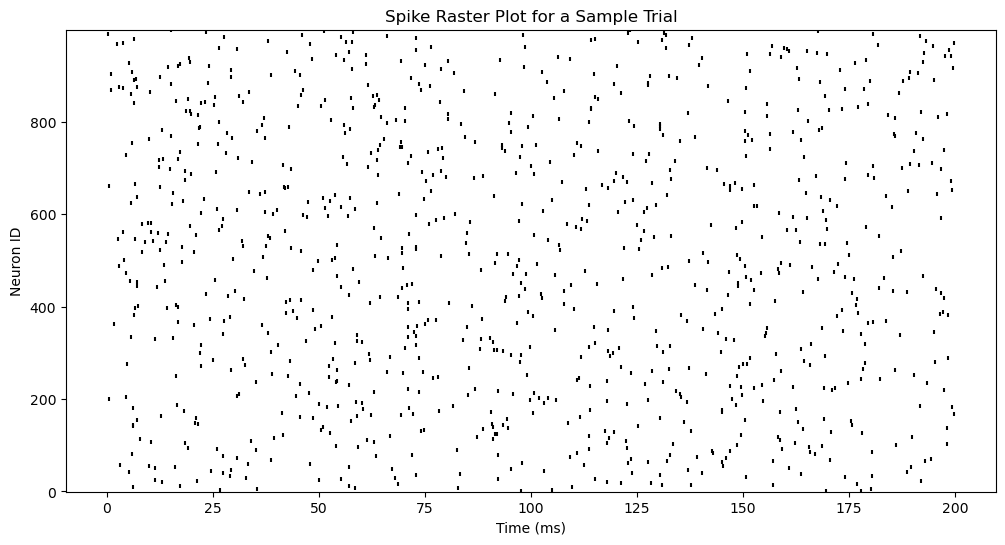

In [5]:
plot_raster(spikes_trials_all[0])  # Plot a raster of spike times for the first trial

In [6]:
tau = 10  # Set the time constant for exponential kernel in milliseconds
lambda_reg = 1e-3  # Set the regularization parameter for ridge regression
rng = np.random.default_rng(2)  # Initialize a random number generator with seed 2

decoder = LinearDecoder(dt, tau, lambda_reg, rng)  # Create a LinearDecoder object with specified parameters

In [7]:
# Preprocess spike data using the decoder's method, applying filtering to all trials
filtered_spikes = decoder.preprocess_data(spikes_trials_all, n_neurons, duration) 

In [8]:
training_trial_indices = list(range(n_trials-2))  # Create a list of indices 0 to 18 for training trials
test_trial_indices = [n_trials-1]  # Use the last trial (index 19) as the test trial

In [9]:
time = np.arange(duration/dt)  # Create a time array from 0 to duration with step size dt
signal = np.zeros((2,int(duration/dt)), dtype=float)  # Initialize a 2D array for two signals
signal[0] = np.sin(5*np.pi*time/10000)  # Set the first signal as a sine wave with frequency 5π/10000
signal[1] = np.sin(10*np.pi*time/10000)  # Set the second signal as a sine wave with frequency 10π/10000

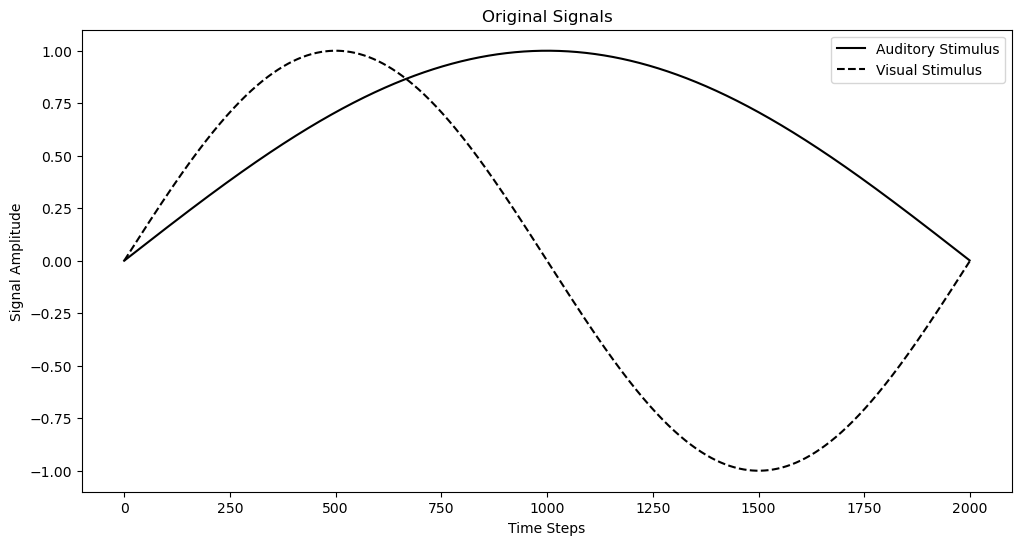

In [20]:
# Plot the original signals and their predictions (if available) using the custom plotting function
plot_results(signal, prediction_train=None, prediction_test=None)

In [21]:
# Fit the decoder using the filtered spike data from training trials and the target signal
decoder.fit(filtered_spikes[training_trial_indices], signal)

In [28]:
prediction_train = decoder.predict(filtered_spikes[training_trial_indices])  # Predict signals using training data
RMSE_train = decoder.compute_rmse(prediction_train, signal)  # Compute RMSE for training predictions
# Print RMSE for training data, specifying auditory and visual stimuli
print("Average training RMSE:")
print(f"     Auditory stimulus: {RMSE_train[0]:.4f}")
print(f"     Visual stimulus: {RMSE_train[1]:.4f}")

prediction_test = decoder.predict(filtered_spikes[test_trial_indices])  # Predict signals using test data
RMSE_test = decoder.compute_rmse(prediction_test, signal)  # Compute RMSE for test predictions
# Print RMSE for test data, specifying auditory and visual stimuli
print("Average test RMSE:")
print(f"     Auditory stimulus: {RMSE_test[0]:.4f}")
print(f"     Visual stimulus: {RMSE_test[1]:.4f}")

Training RMSE:
     Auditory stimulus: 0.0304
     Visual stimulus: 0.0583
Test RMSE:
     Auditory stimulus: 0.2942
     Visual stimulus: 0.6392


# Note on decoder performance with dummy data:

The decoder shows different performance on training and test data due to the random nature of the dummy data:

1. Training performance (blue for auditory, red for visual):
   The decoder appears well-trained on the training data, closely following the original signals (black lines).
   This is evident from the low RMSE values and the close alignment of blue and red lines with black lines.

2. Test performance (cyan for auditory, magenta for visual):
   The decoder performs poorly on the test data, as seen by the significant deviation of cyan and magenta lines
   from the original signals (black lines). This is reflected in higher RMSE values for the test set.

This discrepancy between training and test performance is expected with randomly generated dummy data,
as the decoder may be overfitting to the noise in the training set, which doesn't generalize to the test set.
In real-world applications with meaningful data, we would expect more consistent performance across
training and test sets if the decoder is properly tuned.

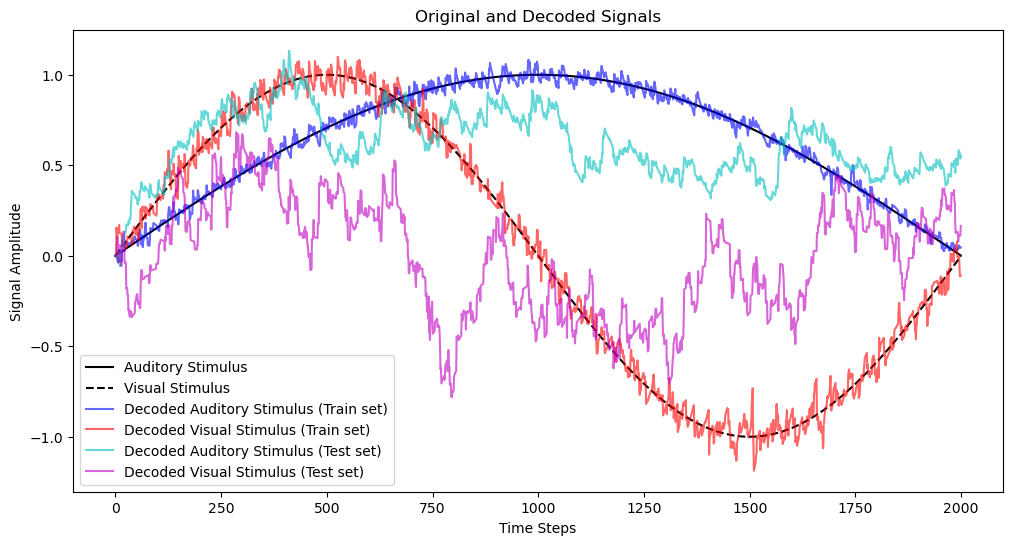

In [30]:
# Plot original signals and decoded predictions for both training and test sets, using different colors to distinguish between them
plot_results(signal, prediction_train, prediction_test)

In [31]:
# Perform stratified cross-validation
train_errors, test_errors, all_weights = decoder.stratified_cv(filtered_spikes, signal, n_splits=5)

# Print average RMSE across all folds for training data
print("Average training RMSE across all folds:")
print(f"     Auditory stimulus: {train_errors.mean(axis=0)[0]:.4f}")
print(f"     Visual stimulus: {train_errors.mean(axis=0)[1]:.4f}")

print()  # Add a blank line for better readability

# Print average RMSE across all folds for test data
print("Average test RMSE across all folds:")
print(f"     Auditory stimulus: {test_errors.mean(axis=0)[0]:.4f}")
print(f"     Visual stimulus: {test_errors.mean(axis=0)[1]:.4f}")


Average training RMSE across all folds:
     Auditory stimulus: 0.0302
     Visual stimulus: 0.0577

Average test RMSE across all folds:
     Auditory stimulus: 0.2953
     Visual stimulus: 0.7385


## The structure of the project is as follows:
```
linear-decoder/
├── src/
│   └── linear_decoder/
│       ├── __init__.py
│       └──linear_decoder.py
├── test_script/
│   └── test_dependencies.py
├── examples/
│   ├── notebook/
│   │ └── linear_decoder.ipynb
│   └── scripts/
│       ├── generate_data.py
│       └── plots.py
├── LICENSE.txt
├── README.md
└── setup.py

```

- src: This directory holds the directory that contains the _**linear_decoder**_ module.
    -lineardecoder: This directory holds the core functionality of the _**linear_decoder**_ module.
    	- __init__.py: Marks the directory as a Python package.
    	- linear_decoder.py: Includes functions and classes defining the main functionalities of the _**linear_decoder**_ module.

- test_script: This directory contains unit tests for the _**linear_decoder**_ module.
    - test_dependencies.py: Unit tests for the functions module.
   
- examples: This directory contains the directories of notebooks and scripts, which are defined for manifesting example usage of the module.
    - notebook: This directory contains the Jupyter notebook for exploratory analysis and demonstrations related to the _**linear_decoder**_ module.
   	 - linear_decoder.ipynb: Jupyter notebook for _**linear_decoder**_ module usage and demonstrations.
	 
    - scripts: This directory contains Python scripts for generating dummy data and plotting the raster plot in the linear_decoder.ipynb.
        - generate_data.py: Script for generating dummy data.
        - plots.py: Script for plotting figures.

- LICENSE: The license file for the project.

- README.md: The README file providing an overview of the project, its purpose, and how to use it.

- setup.py: The setup script for installing the _**linear_decoder**_ module as a Python package.

------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------

## Contributing

Thank you for considering contributing to our project! We welcome contributions from the community to help improve our project and make it even better. To ensure a smooth contribution process, please follow these guidelines:

1. **Fork the Repository**: Fork our repository to your GitHub account and clone it to your local machine.

2. **Branching Strategy**: Create a new branch for your contribution. Use a descriptive branch name that reflects the purpose of your changes.

3. **Code Style**: Follow our coding standards and style guidelines. Make sure your code adheres to the existing conventions to maintain consistency across the project.

4. **Pull Request Process**:
    Before starting work, check the issue tracker to see if your contribution aligns with any existing issues or feature requests.
    Create a new branch for your contribution and make your changes.
    Commit your changes with clear and descriptive messages explaining the purpose of each commit.
    Once you are ready to submit your changes, push your branch to your forked repository.
    Submit a pull request to the main repository's develop branch. Provide a detailed description of your changes and reference any relevant issues or pull requests.

5. **Code Review**: Expect feedback and review from our maintainers or contributors. Address any comments or suggestions provided during the review process.

6. **Testing**: Ensure that your contribution is properly tested. Write unit tests or integration tests as necessary to validate your changes. Make sure all tests pass before submitting your pull request.

7. **Documentation**: Update the project's documentation to reflect your changes. Include any necessary documentation updates, such as code comments, README modifications, or user guides.

8. **License Agreement**: By contributing to our project, you agree to license your contributions under the terms of the project's license (GNU General Public License v3.0).

9. **Be Respectful**: Respect the opinions and efforts of other contributors. Maintain a positive and collaborative attitude throughout the contribution process.

We appreciate your contributions and look forward to working with you to improve our project! If you have any questions or need further assistance, please don't hesitate to reach out to us.

------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------

## Credits

- **Author:** [Farhad Razi](https://github.com/fraziphy)

------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------

## License

This project is licensed under the [GNU General Public License v3.0](LICENSE)

------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------

## Contact

- **Contact information:** [email](farhad.razi.1988@gmail.com)
# Linear_decoder.py
